In [1]:
import pandas as pd
import csv
import numpy
import matplotlib.pyplot as plt  # To visualize
import pandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_listing = pd.read_csv("../../raw_data/sfo/listings-1.csv")
df_rental = pd.read_csv("data/avg_rental_sfo.csv")

#### Check Data Import

In [3]:
df_listing.head()
df_listing["accommodates"].head()
df_listing["neighbourhood_cleansed"]
df_rental

,neighbourhood,Average Rent
0,Alamo Square,3456
1,Anza Vista,3468
2,Ashbury Heights,3809
3,Bayview,3361
4,Bayview Heights,3361
...,...,...
87,Visitacion Valley,3868
88,West of Twin Peaks,3158
89,Western Addition,3030
90,Westwood Park,3907


#### Merge the Airbnb Dataset with the Average Neighbourhood Apartment Rental Pricing

In [4]:
df = pd.merge(df_listing, df_rental, left_on="neighbourhood_cleansed", right_on="neighbourhood")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_y,Average Rent
0,958,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,STR-0001256,f,1,1,0,0,1.91,Western Addition,3030
1,8339,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,STR-0000264,f,2,2,0,0,0.21,Western Addition,3030
2,10824,https://www.airbnb.com/rooms/10824,20200815122856,2020-08-15,Victorian House in Hayes Valley - 3BED-2BA,This property is only available with a minimum...,Neighborhood: HAYES VALLEY. This San Francisco...,https://a0.muscache.com/pictures/45831/ae48b2a...,38836,https://www.airbnb.com/users/show/38836,...,9.0,NaN,f,38,33,5,0,0.15,Western Addition,3030
3,18904,https://www.airbnb.com/rooms/18904,20200815122856,2020-08-15,Lower Haight Urban Zen with private bath,Welcome to the Lower Haight! My neighborhood a...,NaN,https://a0.muscache.com/pictures/11252601/977c...,72464,https://www.airbnb.com/users/show/72464,...,10.0,STR-0000094,f,2,0,2,0,3.92,Western Addition,3030
4,25463,https://www.airbnb.com/rooms/25463,20200815122856,2020-08-16,Modern Zen in the Lower Haight,Welcome to the Lower Haight! My neighborhood a...,NaN,https://a0.muscache.com/pictures/749554/a2d30f...,72464,https://www.airbnb.com/users/show/72464,...,10.0,STR-0000094,f,2,0,2,0,3.73,Western Addition,3030


#### Filtering down to only [Full apartments + Accommodates >2 only] and grouping by neighbourhood mean values

In [5]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df_filtered = df[(df["room_type"] == "Entire home/apt") & (df["accommodates"] == 3)]
df_filtered['price'] = df_filtered['price'].astype(float)
df_filtered = df_filtered[['room_type', 'price', "accommodates", "Average Rent", "neighbourhood_cleansed"]]
df_filtered.groupby("neighbourhood_cleansed").mean()
# df_filtered.info()

<ipython-input-5-86e7855e638f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price'] = df_filtered['price'].astype(float)


,price,accommodates,Average Rent
neighbourhood_cleansed,,,
Bayview,122.625000,3,3361
Bernal Heights,147.333333,3,3061
Castro/Upper Market,155.590909,3,3539
Chinatown,127.392857,3,3502
Crocker Amazon,128.000000,3,3892
Downtown/Civic Center,99.750000,3,2819
Excelsior,105.571429,3,3907
Financial District,236.000000,3,3937
Glen Park,120.333333,3,3571


In [6]:
df_filtered

,room_type,price,accommodates,Average Rent,neighbourhood_cleansed
0,Entire home/apt,132.0,3,3030,Western Addition
14,Entire home/apt,130.0,3,3030,Western Addition
27,Entire home/apt,162.0,3,3030,Western Addition
29,Entire home/apt,125.0,3,3030,Western Addition
47,Entire home/apt,296.0,3,3030,Western Addition
...,...,...,...,...,...
7220,Entire home/apt,95.0,3,3868,Visitacion Valley
7229,Entire home/apt,110.0,3,3868,Visitacion Valley
7230,Entire home/apt,85.0,3,3868,Visitacion Valley
7238,Entire home/apt,75.0,3,3868,Visitacion Valley


#### Split dataset to training and test dataset

In [7]:
from sklearn.model_selection import train_test_split

X = df_filtered["price"].values.reshape(-1, 1)
Y = df_filtered["Average Rent"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)

#### Linear Regression Model

In [8]:
regr = LinearRegression()
regr.fit(X_train, y_train)

Y_pred = regr.predict(X_test)  # make predictions

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# The coefficients
print('Coefficients:', regr.coef_[0][0])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: 0.056230813078893514
Mean squared error: 125828.19
Coefficient of determination: 0.00


#### Plot outputs

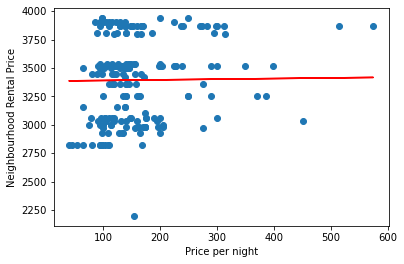

In [13]:
plt.scatter(X_test.ravel().tolist(),y_test)
plt.plot(X_test.ravel().tolist(), Y_pred, color='red')
plt.xlabel("Price per night")
plt.ylabel("Neighbourhood Rental Price")
plt.show()

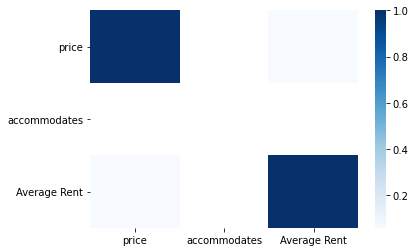

In [11]:
corr = df_filtered.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Blues")

plt.show()